# Analyse de données - Spotify

Après divers observations j'ai décidé d'utiliser principalement le fichier tracks.csv\
Ma problématique est :\
Les critères de popularités qui permettrai à un(e) jeune artiste "touche à tout" d'orienter sa direction artistique.

L'approche :
- Observation initial du fichier
    - Type de données présentes
    - Réalisation d'une matrice de correlation afin d'avoir de nous orienter sur les caratéristiques que l'on va exploiter
- Production de données 
    - 1 diagramme avec données continues, type nuage de point ou histogramme
    - 2 diagrammes avec des données discrètes
    - 3 graphiques avec des données catégoriques
    - 1 boîte à moustaches
    - 1 heat map avec matrice de corrélation
- Conclusion

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
spotify_tracks = pd.read_csv('./datasets/spotify/tracks.csv');spotify_tracks

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.744000,0.1510,0.1270,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.000000,0.1480,0.6550,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.021800,0.2120,0.4570,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.918000,0.1040,0.3970,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.130000,0.3110,0.1960,103.220,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586667,5rgu12WBIHQtvej2MdHSH0,云与海,50,258267,0,['阿YueYue'],['1QLBXKM5GCpyQQSVMNZqrZ'],2020-09-26,0.560,0.5180,0,-7.471,0,0.0292,0.785,0.000000,0.0648,0.2110,131.896,4
586668,0NuWgxEp51CutD2pJoF4OM,blind,72,153293,0,['ROLE MODEL'],['1dy5WNgIKQU6ezkpZs4y8z'],2020-10-21,0.765,0.6630,0,-5.223,1,0.0652,0.141,0.000297,0.0924,0.6860,150.091,4
586669,27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,70,187601,0,['FINNEAS'],['37M5pPGs6V1fchFJSgCguX'],2020-09-02,0.535,0.3140,7,-12.823,0,0.0408,0.895,0.000150,0.0874,0.0663,145.095,4
586670,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,58,142003,0,"['Gentle Bones', 'Clara Benin']","['4jGPdu95icCKVF31CcFKbS', '5ebPSE9YI5aLeZ1Z2g...",2021-03-05,0.696,0.6150,10,-6.212,1,0.0345,0.206,0.000003,0.3050,0.4380,90.029,4


Notre population sera 586 672 éléments, ayant 20 caratéristiques.  
Regardons les différents caractéristiques présentent dans notre dataset afin de savoir celles qui pourront apparaître dans notre matrice de correlation.

In [10]:
spotify_tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586672 non-null  int64  
 3   duration_ms       586672 non-null  int64  
 4   explicit          586672 non-null  int64  
 5   artists           586672 non-null  object 
 6   id_artists        586672 non-null  object 
 7   release_date      586672 non-null  object 
 8   danceability      586672 non-null  float64
 9   energy            586672 non-null  float64
 10  key               586672 non-null  int64  
 11  loudness          586672 non-null  float64
 12  mode              586672 non-null  int64  
 13  speechiness       586672 non-null  float64
 14  acousticness      586672 non-null  float64
 15  instrumentalness  586672 non-null  float64
 16  liveness          58

Au vu de la problématique l'utilisation du 'popularity' est évidante, cette caractéristique sera notre référence principale afin de répondre à notre problématique.

In [9]:
spotify_tracks["popularity"].describe()

count    586672.000000
mean         27.570053
std          18.370642
min           0.000000
25%          13.000000
50%          27.000000
75%          41.000000
max         100.000000
Name: popularity, dtype: float64

On peut obverver un moyenne de 27.570053, associé à une variance de 18.370642 on pourrait avancer que la moyenne n'est pas représentative.
En regardant les quartiles on peut observer que la médianne (le 50% dans la cellule au dessus) se situe autour de 27 ce que est à 0.570053 notre moyenne. 
On voit aussi que 75% de notre population se situe entre 0 et 41.

Observont visuellement les données fournis par le discribe avec un graphique de distribution

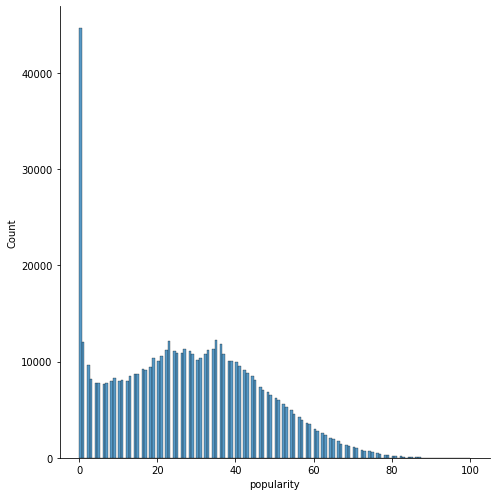

In [11]:
sns.displot(spotify_tracks["popularity"], height=7)

La matrice de distribution nous permet d'observer qu'une grande population à une population de 0.
On pourrait se poser des questions:
- Notre population ayant une population de 0 post-elle de la musique? Si oui combien de titre à t-elle posté en moyenne tout en veillant à la représentativité de cette moyenne avec la variance ?
- Y a t-il des correlations se rapprochant 1 entre certaines caractéristiques de notre dataset et cette population de 0?

Cette ensemble de questions nous les orienterons vers les 25% de notre population ayant une popularité supérieur à 41 afin d'avoir selon moi, des données plus représentatives.

In [12]:
spotify_tracks = spotify_tracks[spotify_tracks.popularity > 41]; spotify_tracks

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
1857,3BFRqZFLSrqtQr6cjHbAxU,Ain't Misbehavin',51,237773,0,['Fats Waller'],['0DYWCXTkNqGFZIf67SrWEa'],1926,0.515,0.2220,0,-16.918,0,0.0575,0.821,0.001930,0.1900,0.3500,98.358,4
1858,0eInL1bLAFdHJDL04R0OCP,Two Sleepy People,48,183560,0,['Fats Waller'],['0DYWCXTkNqGFZIf67SrWEa'],1926,0.651,0.0867,5,-18.882,1,0.0480,0.725,0.000065,0.1690,0.5400,87.221,4
3857,61znp1Iy11bdJ2YAbwaqw7,"Sing, Sing, Sing",51,520133,0,['Benny Goodman'],['1pBuKaLHJlIlqYxQQaflve'],1928,0.626,0.7440,2,-9.189,0,0.0662,0.847,0.892000,0.1450,0.2590,113.117,4
3858,2P9nh9pTK96dE0b6NBbTSs,"Dark Was the Night, Cold Was the Ground",47,198560,0,['Blind Willie Johnson'],['5kO4xdEKLuHHHPreu3UmkZ'],1928,0.394,0.0406,9,-23.179,1,0.0440,0.968,0.045300,0.0976,0.2000,116.117,1
3859,0EzykG4pYlmmGTihakWGRL,It's Nobody's Fault but Mine,43,188533,0,['Blind Willie Johnson'],['5kO4xdEKLuHHHPreu3UmkZ'],1928,0.676,0.2520,3,-14.010,1,0.0390,0.980,0.000074,0.1100,0.4830,83.901,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586665,0SjsIzJkZfDU7wlcdklEFR,John Brown's Song,66,185250,0,['Gregory Oberle'],['4MxqhahGRT4BPz1PilXGeu'],2020-03-20,0.562,0.0331,1,-25.551,1,0.1030,0.996,0.961000,0.1110,0.3860,63.696,3
586667,5rgu12WBIHQtvej2MdHSH0,云与海,50,258267,0,['阿YueYue'],['1QLBXKM5GCpyQQSVMNZqrZ'],2020-09-26,0.560,0.5180,0,-7.471,0,0.0292,0.785,0.000000,0.0648,0.2110,131.896,4
586668,0NuWgxEp51CutD2pJoF4OM,blind,72,153293,0,['ROLE MODEL'],['1dy5WNgIKQU6ezkpZs4y8z'],2020-10-21,0.765,0.6630,0,-5.223,1,0.0652,0.141,0.000297,0.0924,0.6860,150.091,4
586669,27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,70,187601,0,['FINNEAS'],['37M5pPGs6V1fchFJSgCguX'],2020-09-02,0.535,0.3140,7,-12.823,0,0.0408,0.895,0.000150,0.0874,0.0663,145.095,4


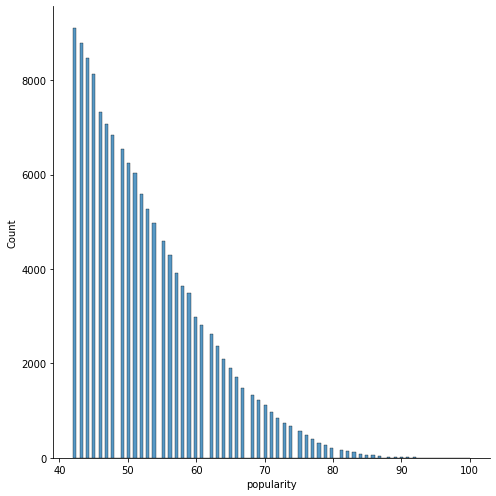

In [13]:
sns.displot(spotify_tracks["popularity"], height=7)

À présent voyons la matrice de la matrice de correlation en ne prenant que les caractéristiques ayant un datatype numériques (int et float)

<AxesSubplot:>

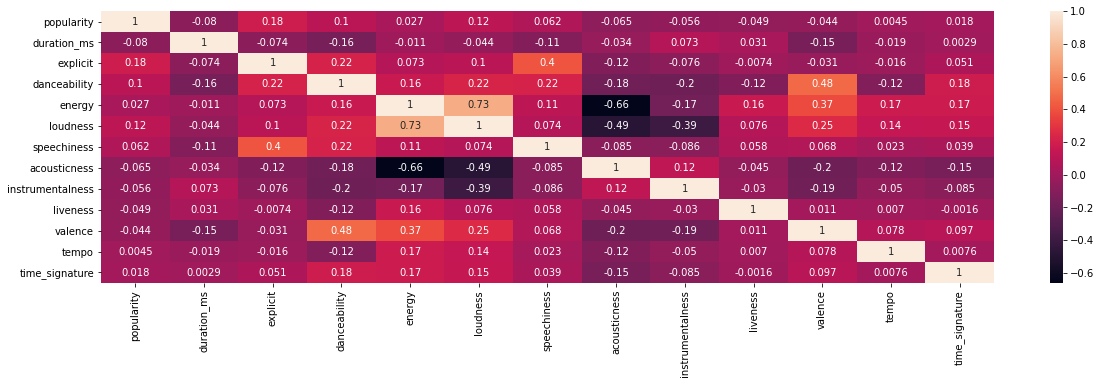

In [14]:
#spotify_tracks = spotify_tracks.iloc[:,[2,3,4,8,9,11,13,14,15,16,17,18,19]]; 
corr = spotify_tracks.iloc[:,[2,3,4,8,9,11,13,14,15,16,17,18,19]].corr()
f, ax = plt.subplots(figsize=(20,5))
sns.heatmap(corr, annot=True, ax =ax)

<AxesSubplot:xlabel='explicit', ylabel='popularity'>

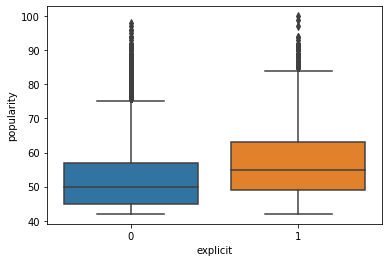

In [15]:
sns.boxplot(x="explicit", y="popularity", data=spotify_tracks)

La donnée observé présente des données absurdes, cepandant selon moi il est préférable de les garder afin que l'artiste et son entourage ai l'opportunité de tiré leurs conclusions avec une donnée que je trouve représentive l'industrie de la musique.
Le graphique ci dessus n'étant pas très lisible. Nous voir les mé

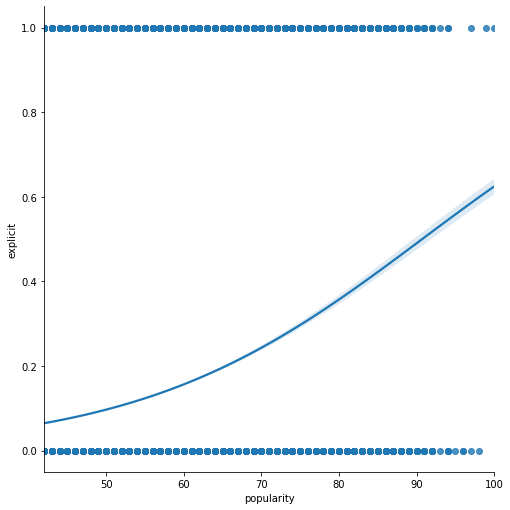

In [18]:
sns.lmplot(x="popularity", y="explicit", data=spotify_tracks, logistic=True, height= 7)

Ce 

In [159]:
spotify_artists = pd.read_csv('./datasets/spotify/data_by_artist_o.csv');spotify_artists.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28680 entries, 0 to 28679
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   genres            28680 non-null  object 
 1   artists           28680 non-null  object 
 2   acousticness      28680 non-null  float64
 3   danceability      28680 non-null  float64
 4   duration_ms       28680 non-null  float64
 5   energy            28680 non-null  float64
 6   instrumentalness  28680 non-null  float64
 7   liveness          28680 non-null  float64
 8   loudness          28680 non-null  float64
 9   speechiness       28680 non-null  float64
 10  tempo             28680 non-null  float64
 11  valence           28680 non-null  float64
 12  popularity        28680 non-null  float64
 13  key               28680 non-null  int64  
 14  mode              28680 non-null  int64  
 15  count             28680 non-null  int64  
dtypes: float64(11), int64(3), object(2)
memo

Artistes 

In [160]:
spotify_artists = spotify_artists[spotify_artists.popularity > 41]; spotify_artists

,genres,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
4,[],"""Joseph And The Amazing Technicolor Dreamcoat""...",0.510714,0.467143,270436.142857,0.488286,0.009400,0.1950,-10.236714,0.098543,122.835857,0.482286,43.000000,5,1,7
9,"['emo rap', 'florida rap', 'sad rap', 'undergr...",$NOT,0.544467,0.789800,137910.466667,0.532933,0.023063,0.1803,-9.149267,0.293687,112.344800,0.480700,67.533333,1,1,15
10,"['dark trap', 'meme rap']",$atori Zoom,0.239000,0.883000,141519.000000,0.625000,0.000000,0.0765,-4.098000,0.245000,126.677000,0.871000,67.000000,6,1,2
11,[],$pyda,0.000122,0.514000,331240.000000,0.899000,0.079300,0.3670,-5.115000,0.060200,174.028000,0.266000,59.000000,7,1,1
12,"['asian american hip hop', 'cali rap', 'west c...",$tupid Young,0.148100,0.854000,190572.000000,0.683000,0.000002,0.1885,-6.997000,0.221000,100.724500,0.625500,57.500000,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28671,[],須田景凪,0.028100,0.559000,209636.000000,0.873000,0.000000,0.1850,-4.401000,0.054300,150.055000,0.797000,67.000000,0,0,2
28672,[],高慧君,0.686000,0.520000,286840.000000,0.285000,0.000000,0.0931,-10.754000,0.027000,93.922000,0.079800,53.000000,10,1,2
28673,"['c-pop', 'classic mandopop', 'vintage chinese...",鳳飛飛,0.884000,0.358000,259387.000000,0.208000,0.000002,0.1500,-9.524000,0.033900,131.261000,0.278000,43.000000,10,1,2
28674,[],鹿谷樹,0.006550,0.603000,206180.000000,0.964000,0.000003,0.1430,-2.886000,0.048700,135.028000,0.796000,76.000000,8,0,2
